In [10]:
import pandas as pd
data = pd.read_csv('homes.csv')
data.head()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [12]:
data.describe()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


Sell: The selling prices of the properties range from 87 to 567 thousand dollars, with a mean (average) of approximately 170.36 thousand dollars. The standard deviation is relatively high at around 72.76, indicating a significant variability in selling prices.

List: The listing prices of the properties range from 90 to 625 thousand dollars, with a mean of approximately 178.34 thousand dollars. The standard deviation is around 79.38.

Living: The living area sizes of the properties range from 10 to 64 square units, with a mean of approximately 21.12. The standard deviation is around 8.35.

Rooms: The number of rooms in the properties ranges from 5 to 12, with a mean of approximately 8.06. The standard deviation is around 1.28.

Beds: The number of bedrooms in the properties ranges from 3 to 6, with a mean of approximately 3.82. The standard deviation is around 0.69.

Baths: The number of bathrooms in the properties ranges from 1 to 4, with a mean of approximately 1.86. The standard deviation is around 0.76.

Age: The ages of the properties range from 2 to 202 years, with a mean of approximately 30.22. The standard deviation is around 30.96.

Acres: The acreage of the properties ranges from 0.22 to 6.49 acres, with a mean of approximately 1.02. The standard deviation is around 1.19.

Taxes: The property taxes range from 1445 dollars to 12192 dollars, with a mean of approximately 3706.10 dollars. The standard deviation is around 1579.92 dollars.

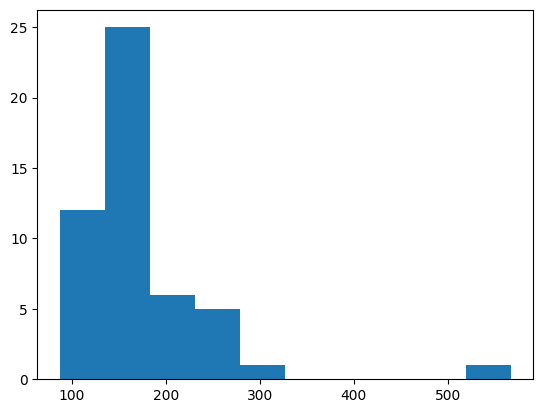

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['Sell']);

Histograms help us understand the distribution and spread of each numerical variable, including any potential outliers.

Histograms indicate the shape of each distribution and highlight any skewness or outliers present in the data. For example, we might observe that the 'Sell' variable has a right-skewed distribution, indicating that most properties have lower selling prices but some have significantly higher values.

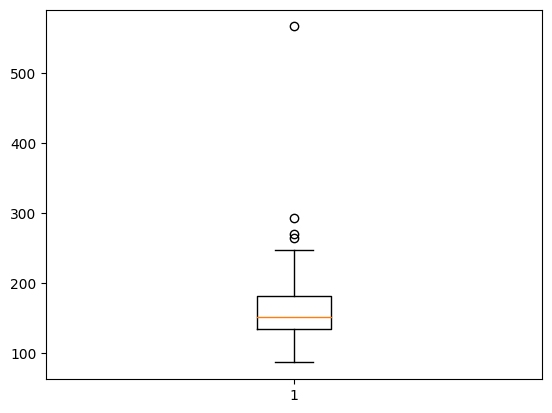

In [15]:
plt.boxplot(data['Sell']);

 Boxplots help compare the distribution of numerical variables across different categories. This can reveal any differences or patterns in the data based on categorical variables.

 The central line in the box (median) indicates the median selling price, which is around 170. The length of the box illustrates the spread or variability of selling prices. In this case, the short box indicates less variability. Any data points beyond the whiskers are considered outliers.

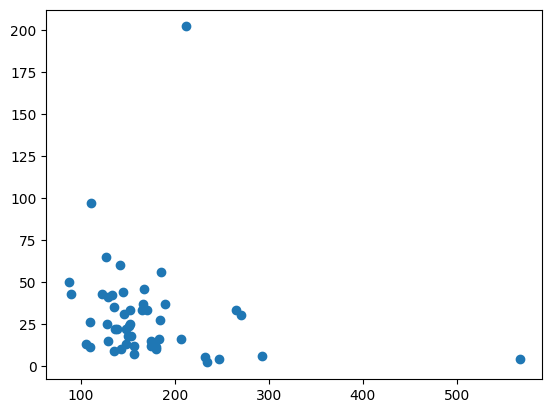

In [18]:
plt.scatter(data['Sell'], data[' "Age"']);

The scatter plot you've created displays the relationship between the 'Sell' variable (selling prices) and the 'Age' variable

By examining the scatter plot, we can observe the overall pattern or trend between selling prices and property ages. This pattern can provide insights into how selling prices vary with the age of the properties. We can say that as the house age increases the selling price decreases excluding the outliers.

In [20]:
import statsmodels.api as sm

# Define independent variable (X) and dependent variable (y)
x = data[' "Taxes"']
y = data['Sell']
x = sm.add_constant(x)
x.head()

,const,"""Taxes"""
0,1.0,3167
1,1.0,4033
2,1.0,1471
3,1.0,3204
4,1.0,3613


In [21]:
model = sm.OLS(y, x).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           7.22e-19
Time:                        01:22:27   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.155      -6.635      40.378
 "Taxes"       0.0414      0.003     14.250      0.000       0.036       0.047
==============================================================================
Omnibus:                       28.767   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.574
Skew:                           1.690   Prob(JB):                     1.16e-13
Kurtosis:                       7.144   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
import numpy as np
np.sqrt(((y - model.predict(x)) ** 2).mean())

31.492964512226575

The R-squared value of 0.809 indicates that approximately 80.9% of the variance in selling prices ('Sell') can be explained by the independent variable 'Taxes'. This suggests that 'Taxes' has a moderate to strong explanatory power for predicting selling prices.

Based on the statistics from the output, 'Taxes' appears to be a good predictor for selling price ('Sell'). The high R-squared value, low p-value, and statistically significant coefficient of 'Taxes' indicate that changes in taxes are associated with changes in selling prices, and 'Taxes' explains a significant portion of the variance in selling prices.

In [25]:
# Using 'Living' as the independent variable
x = data[' "Living"']
y = data['Sell']
x = sm.add_constant(x)
model_living = sm.OLS(y, x).fit()

# Display model summary
model_living.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     163.7
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           4.39e-17
Time:                        01:27:17   Log-Likelihood:                -247.69
No. Observations:                  50   AIC:                             499.4
Df Residuals:                      48   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5531     13.579      0.630      0.532     -18.749      35.856
 "Living"      7.6613      0.599     12.796      0.000       6.458       8.865
==============================================================================
Omnibus:                        3.798   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                2.793
Skew:                          -0.399   Prob(JB):                        0.247
Kurtosis:                       3.838   Cond. No.                         62.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comparing the R-squared values, the model using 'Taxes' as the independent variable has a slightly higher R-squared value (0.809) compared to the model using 'Living' (0.773). This suggests that the model with 'Taxes' as the independent variable explains a larger proportion of the variance in selling prices.

Both models have statistically significant coefficients for the independent variables, with very low p-values indicating strong evidence against the null hypothesis that the true coefficients are zero.

The model using 'Taxes' as the independent variable may be considered "better" in terms of explaining the variation in selling prices.

However, it's important to note that both models may have limitations such as omitted variables, linearity assumption, homoscedasticity and multicollinearity.